# 数据分析

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pprint import pprint

## 测试标签和特征绘制相关性图谱

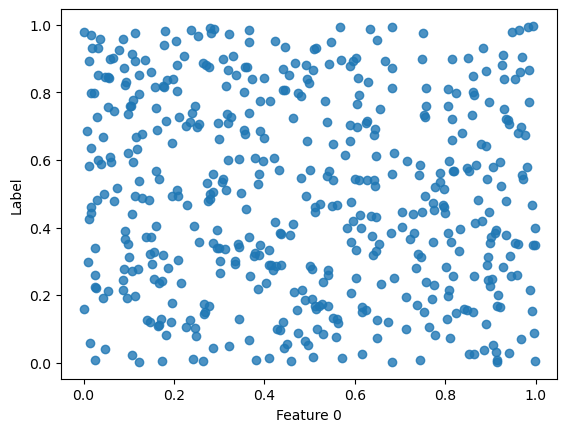

In [31]:
# # 生成标签和特征数据
# labels = np.random.rand(100)
# features = np.random.rand(100, 5)

# # 绘制散点图
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# for i in range(features.shape[1]):
#     axs[i//3, i%3].scatter(features[:, i], labels)
#     axs[i//3, i%3].set_xlabel('Feature %d' % i)
#     axs[i//3, i%3].set_ylabel('Label')
# plt.show()
# 生成标签和特征数据
labels = np.random.rand(500)
features = np.random.rand(500, 5)

# 计算点的数量和位置
unique, counts = np.unique(features, axis=0, return_counts=True)
duplicates = unique[counts > 1]
duplicates_counts = counts[counts > 1]

# 绘制散点图
fig, ax = plt.subplots()
for i in range(features.shape[1]):
    # 将重复的点颜色加深
    for j in range(len(duplicates)):
        mask = np.all(features == duplicates[j], axis=1)
        ax.scatter(features[mask, i], labels[mask], color='C%d' % i, alpha=0.2 + duplicates_counts[j] * 0.1)
    # 绘制非重复的点
    mask = np.all(features != duplicates[:, np.newaxis, :], axis=2).all(axis=0)
    ax.scatter(features[mask, i], labels[mask], color='C%d' % i, alpha=0.8)
    ax.set_xlabel('Feature %d' % i)
    ax.set_ylabel('Label')
    break
plt.show()

## WASSA2023 数据集分析

### 读取wassa2023训练集标签和特征

In [2]:
train = pd.read_csv("./2023/WASSA23_essay_level_with_labels_train.tsv", sep='\t', header=0)

# 标签
train_empathy = train["empathy"].tolist()
train_distress = train["distress"].tolist()
train_emotion = train["emotion"].tolist()

# 特征
train_gender = train["gender"].tolist()
train_education = train["education"].tolist()
train_race = train["race"].tolist()
train_age = train["age"].tolist()
train_income = train["income"].tolist()

In [74]:
def draw_figs(labels, features, labels_name, features_name):
    # 绘制散点图
    fig, ax = plt.subplots()
    # for i in range(features.shape[1]):
    for i in range(len(labels)):
        ax.scatter(features[i], labels[i], alpha=0.15, c='b')
        if (features[i], labels[i]) in zip(features[:i], labels[:i]):
            ax.scatter(features[i], labels[i], alpha=0.01, c='b')
        ax.set_xlabel(features_name)
        ax.set_ylabel(labels_name)
    plt.show()

In [5]:
def draw_freq_figs(labels, labels_name):
    # 统计频数
    bins = np.arange(1, 7, 0.2) # 指定区间范围和区间宽度
    freq, _ = np.histogram(labels, bins=bins)

    # 绘制折线图
    plt.plot(bins[:-1], freq)

    # 添加标题和轴标签
    plt.title("freq fig")
    plt.xlabel(labels_name)
    plt.ylabel("freq")

    # 显示图像
    plt.show()

#### empathy频数图

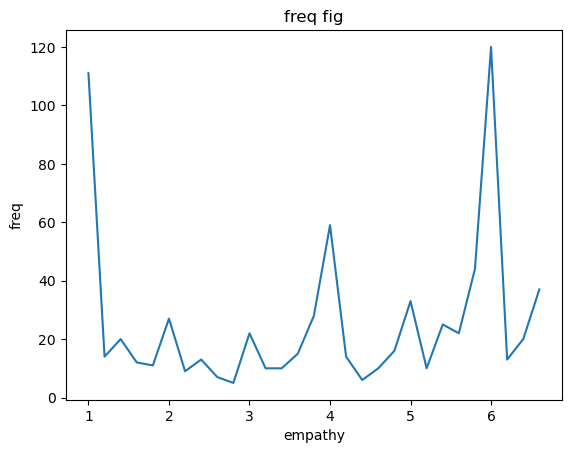

In [6]:
draw_freq_figs(train_empathy, "empathy")

#### distress频数图

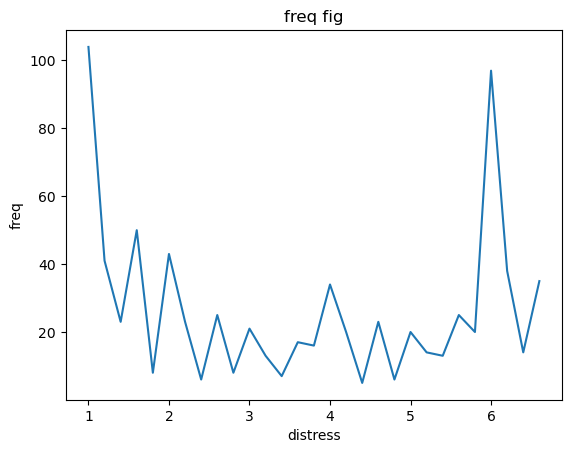

In [7]:
draw_freq_figs(train_distress, "distress")

#### empathy与各特征的关系

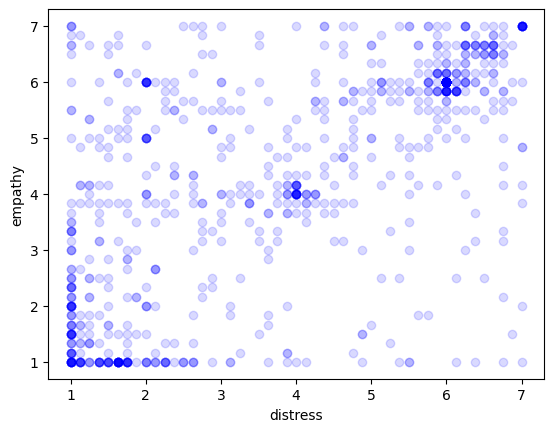

In [57]:
# 和distress关系
draw_figs(train_empathy, train_distress, features_name='distress', labels_name='empathy')

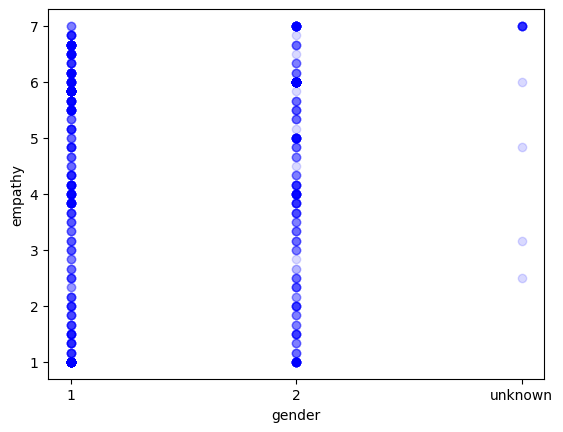

In [59]:
# 和gender关系
draw_figs(train_empathy, train_gender, features_name='gender', labels_name='empathy')

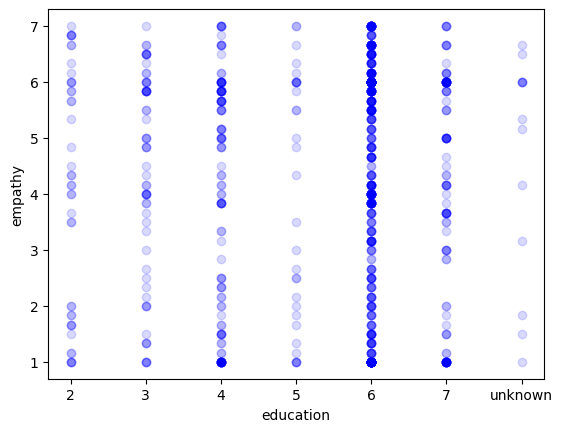

In [75]:
# 和education关系
draw_figs(train_empathy, sorted(train_education), features_name='education', labels_name='empathy')

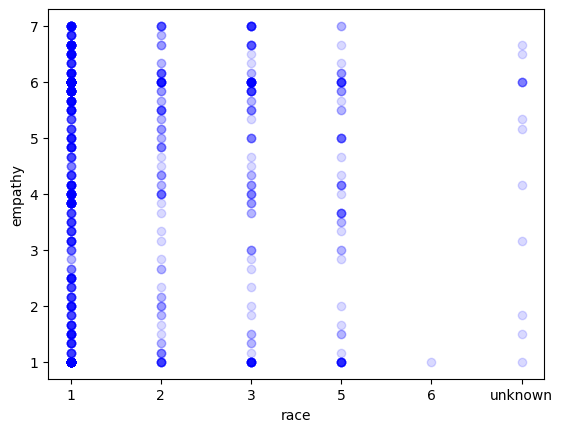

In [78]:
# 和race关系
draw_figs(train_empathy, sorted(train_race), features_name='race', labels_name='empathy')

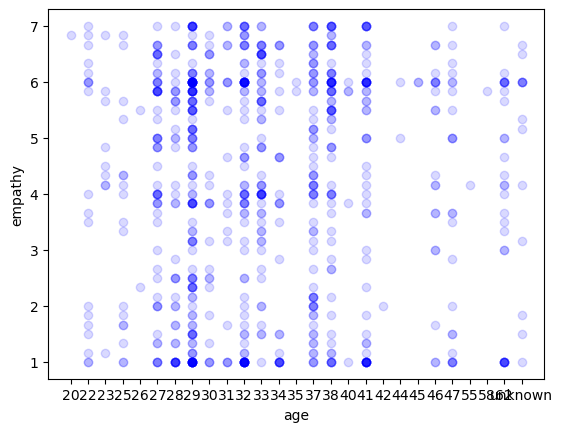

In [76]:
# 和age关系
draw_figs(train_empathy, sorted(train_age), features_name='age', labels_name='empathy')

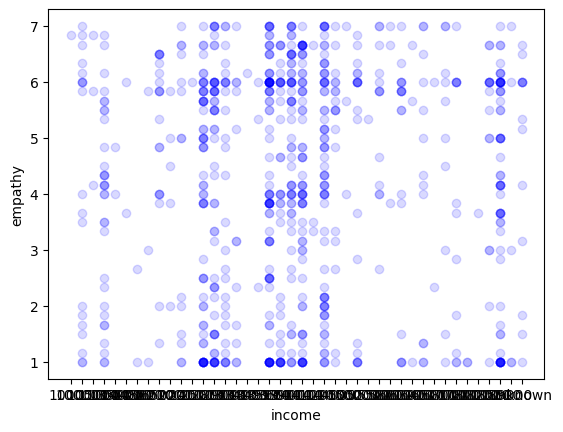

In [77]:
# 和income关系
draw_figs(train_empathy, sorted(train_income), features_name='income', labels_name='empathy')

#### distress与各特征的关系

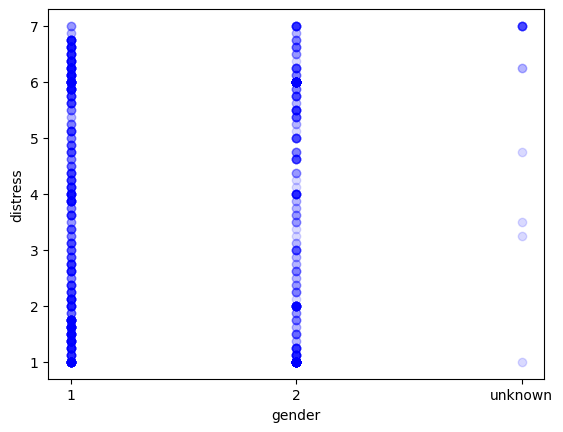

In [64]:
# 和gender关系
draw_figs(train_distress, train_gender, features_name='gender', labels_name='distress')

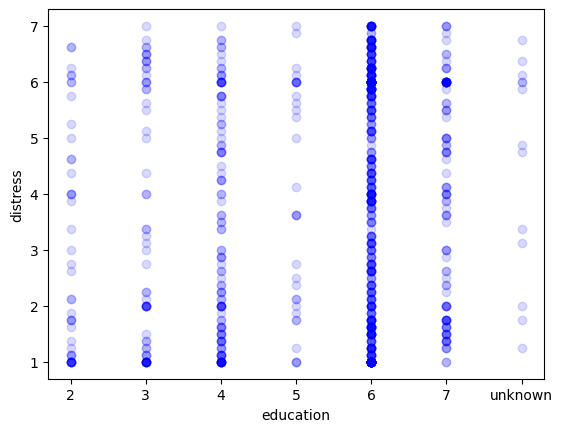

In [80]:
# 和education关系
draw_figs(train_distress, sorted(train_education), features_name='education', labels_name='distress')

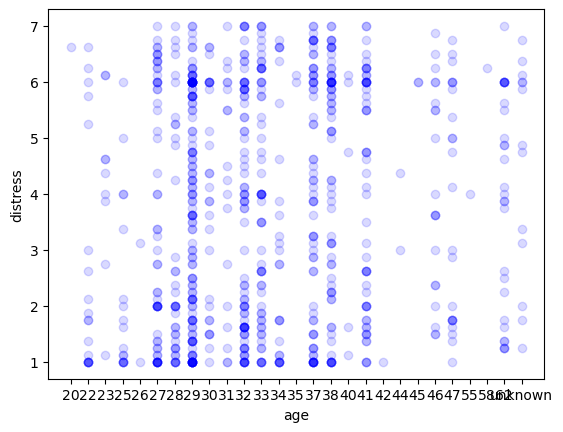

In [79]:
# 和age关系
draw_figs(train_distress, sorted(train_age), features_name='age', labels_name='distress')

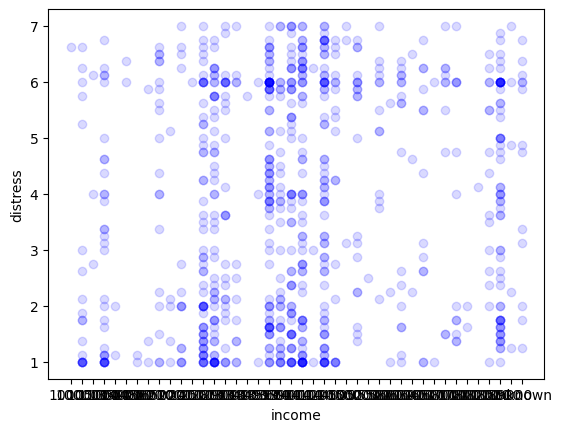

In [81]:
# 和income关系
draw_figs(train_distress, sorted(train_income), features_name='income', labels_name='distress')

#### emotion标签分析

In [32]:
# 训练集单标签
emotion_num_dict = {}
for item in train_emotion:
    item = item.split('/')
    for e in item:
        emotion_num_dict[e] = emotion_num_dict[e]+1 if e in emotion_num_dict else 1
print(emotion_num_dict)

{'Hope': 32, 'Sadness': 383, 'Anger': 124, 'Neutral': 240, 'Disgust': 100, 'Fear': 33, 'Joy': 10, 'Surprise': 19}


In [8]:
# 验证集单标签
emotion_num_dict = {}
for item in dev_emotion:
    item = item.split('/')
    for e in item:
        emotion_num_dict[e] = emotion_num_dict[e]+1 if e in emotion_num_dict else 1
print(emotion_num_dict)

{'Sadness': 101, 'Neutral': 54, 'Anger': 38, 'Hope': 16, 'Disgust': 24, 'Fear': 8, 'Surprise': 3, 'Joy': 2}


In [3]:
ml_emotion_num_dict = {}
for e in train_emotion:
    ml_emotion_num_dict[e] = ml_emotion_num_dict[e]+1 if e in ml_emotion_num_dict else 1
print(ml_emotion_num_dict)

{'Hope/Sadness': 15, 'Anger': 67, 'Sadness': 297, 'Neutral': 202, 'Disgust/Sadness': 18, 'Anger/Disgust': 28, 'Fear/Sadness': 16, 'Joy': 5, 'Hope': 10, 'Joy/Neutral': 1, 'Disgust': 44, 'Neutral/Sadness': 18, 'Neutral/Surprise': 2, 'Anger/Neutral': 8, 'Hope/Neutral': 4, 'Surprise': 9, 'Anger/Sadness': 14, 'Fear': 10, 'Anger/Joy': 1, 'Disgust/Fear': 2, 'Fear/Neutral': 2, 'Fear/Hope': 2, 'Joy/Sadness': 3, 'Anger/Disgust/Sadness': 1, 'Anger/Surprise': 3, 'Disgust/Neutral': 3, 'Anger/Fear': 1, 'Sadness/Surprise': 1, 'Disgust/Surprise': 4, 'Anger/Hope': 1}


In [9]:
ml_emotion_num_dict = {}
for e in dev_emotion:
    ml_emotion_num_dict[e] = ml_emotion_num_dict[e]+1 if e in ml_emotion_num_dict else 1
print(ml_emotion_num_dict)

{'Sadness': 75, 'Neutral': 47, 'Anger': 23, 'Hope/Neutral': 2, 'Disgust': 11, 'Fear/Sadness': 2, 'Hope/Sadness': 7, 'Anger/Disgust': 7, 'Anger/Neutral': 1, 'Fear': 6, 'Neutral/Sadness': 3, 'Sadness/Surprise': 2, 'Hope': 6, 'Joy': 2, 'Anger/Sadness': 7, 'Disgust/Sadness': 5, 'Disgust/Hope': 1, 'Neutral/Surprise': 1}


#### 结论
基本无明显关系，empathy和distress之间有一点关联，可以考虑尝试多任务

## 数据集划分整理成json格式

### 读取2023数据集

In [3]:
emotion_list = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

In [5]:
# 训练集
train_essays = train["essay"].tolist()
train_essay_ids = train["essay_id"].to_list()
train_speaker_ids = train["speaker_id"].to_list()
train_article_ids = train["article_id"].to_list()
# personality_conscientiousness	personality_openess	personality_extraversion	personality_agreeableness	personality_stability
train_per_cons = train["personality_conscientiousness"].to_list()
train_per_open = train["personality_openess"].to_list()
train_per_extv = train["personality_extraversion"].to_list()
train_per_agre = train["personality_agreeableness"].to_list()
train_per_stab = train["personality_stability"].to_list()
# iri_perspective_taking	iri_personal_distress	iri_fantasy	iri_empathatic_concern
train_iri_pers = train["iri_perspective_taking"].to_list()
train_iri_dist = train["iri_personal_distress"].to_list()
train_iri_fant = train["iri_fantasy"].to_list()
train_iri_emp = train["iri_empathatic_concern"].to_list()

train_data = []
with open("./train.json", 'w') as f:
    for i in range(len(train_essays)):
        essay = ' '.join(train_essays[i].split())
        emotion_label = [0]*8
        item_emotion = train_emotion[i].split('/')
        for i_emo in item_emotion:
            emotion_label[emotion_list.index(i_emo)] = 1
        item = {'essay_id': train_essay_ids[i], 'speaker_id': train_speaker_ids[i], 
                'article_id': train_article_ids[i],
                'essay': essay, 'empathy': train_empathy[i], 'distress': train_distress[i],
                'emotion': emotion_label, 'personality_conscientiousness': train_per_cons[i],
                'personality_openess': train_per_open[i], 'personality_extraversion': train_per_extv[i],
                'personality_agreeableness': train_per_agre[i], 'personality_stability': train_per_stab[i],
                'iri_perspective_taking': train_iri_pers[i], 'iri_personal_distress': train_iri_dist[i],
                'iri_fantasy': train_iri_fant[i], 'iri_empathatic_concern': train_iri_emp[i]}
        train_data.append(item)
    json.dump(train_data, f)

猜想：与speaker_id会否有联系？

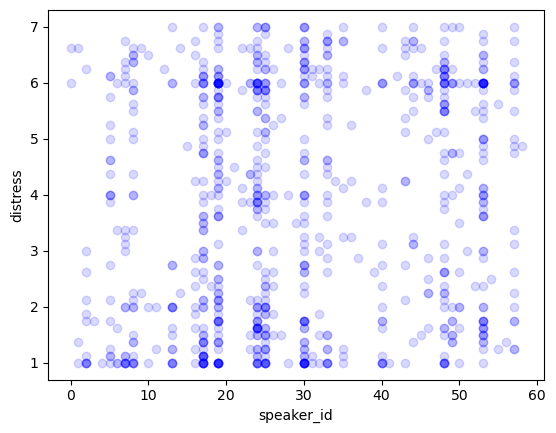

In [99]:
# distress和speaker关系
draw_figs(train_distress, sorted(train_speaker_ids), features_name='speaker_id', labels_name='distress')

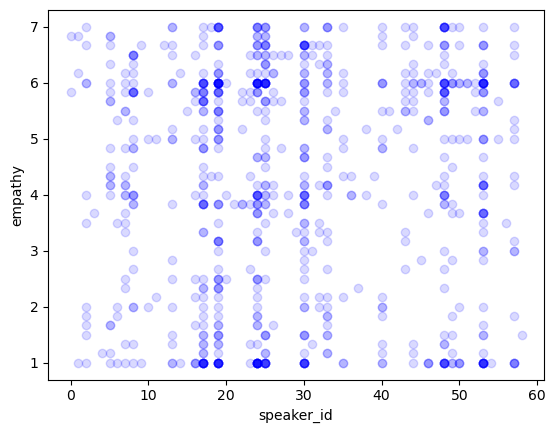

In [100]:
# empathy和speaker关系
draw_figs(train_empathy, sorted(train_speaker_ids), features_name='speaker_id', labels_name='empathy')

猜想：与article_id会否有联系？

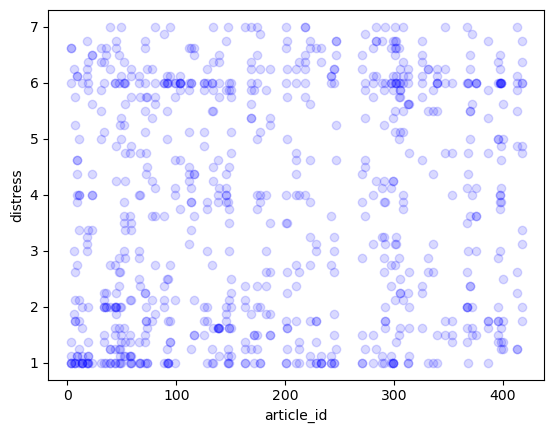

In [101]:
# distress和article关系
draw_figs(train_distress, sorted(train_article_ids), features_name='article_id', labels_name='distress')

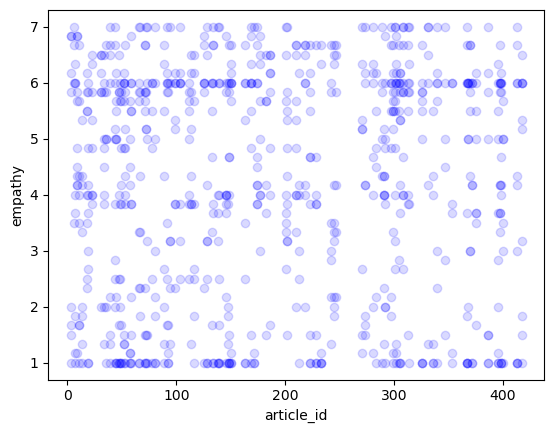

In [102]:
# empathy和article关系
draw_figs(train_empathy, sorted(train_article_ids), features_name='article_id', labels_name='empathy')

In [6]:
dev = pd.read_csv("./2023/WASSA23_essay_level_dev.tsv", sep='\t', header=0)
dev_labels = pd.read_csv("./2023/goldstandard_dev.tsv", sep='\t', header=None)

In [7]:
# 验证集
dev_essays = dev["essay"].tolist()
dev_essay_ids = dev["essay_id"].to_list()
dev_speaker_ids = dev["speaker_id"].to_list()
dev_article_ids = dev["article_id"].to_list()

dev_empathy = dev_labels[0].tolist()
dev_distress = dev_labels[1].tolist()
dev_emotion = dev_labels[2].tolist()
# personality_conscientiousness	personality_openess	personality_extraversion	personality_agreeableness	personality_stability
dev_per_cons = dev_labels[3].to_list()
dev_per_open = dev_labels[4].to_list()
dev_per_extv = dev_labels[5].to_list()
dev_per_agre = dev_labels[6].to_list()
dev_per_stab = dev_labels[7].to_list()
# iri_perspective_taking	iri_personal_distress	iri_fantasy	iri_empathatic_concern
dev_iri_pers = dev_labels[8].to_list()
dev_iri_dist = dev_labels[9].to_list()
dev_iri_fant = dev_labels[10].to_list()
dev_iri_emp = dev_labels[11].to_list()


#### dev上empathy和distress频数图

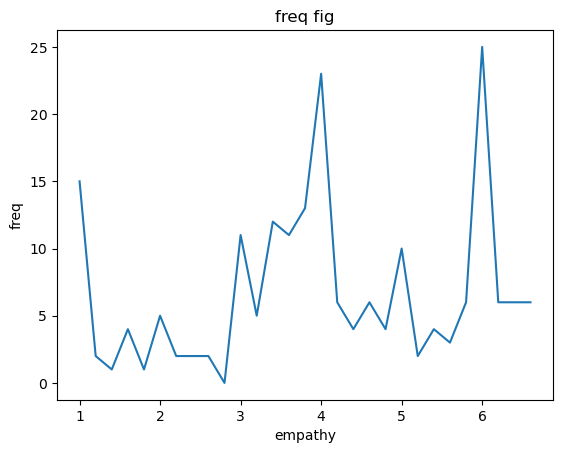

In [13]:
draw_freq_figs(dev_empathy, "empathy")

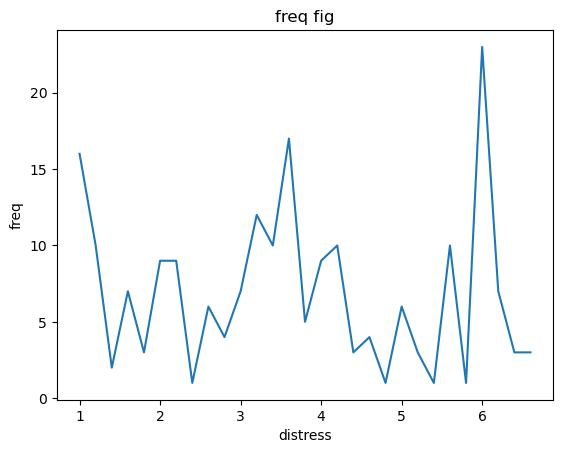

In [14]:
draw_freq_figs(dev_distress, "distress")

In [ ]:
dev_data = []
with open("./dev.json", 'w') as f:
    for i in range(len(dev_essays)):
        essay = ' '.join(dev_essays[i].split())
        emotion_label = [0]*8
        item_emotion = dev_emotion[i].split('/')
        for i_emo in item_emotion:
            emotion_label[emotion_list.index(i_emo)] = 1
        item = {
                'essay_id': dev_essay_ids[i], 
                'speaker_id': dev_speaker_ids[i], 
                'article_id': dev_article_ids[i],
                'essay': essay, 'empathy': dev_empathy[i], 'distress': dev_distress[i],
                'emotion': emotion_label, 'personality_conscientiousness': dev_per_cons[i],
                'personality_openess': dev_per_open[i], 'personality_extraversion': dev_per_extv[i],
                'personality_agreeableness': dev_per_agre[i], 'personality_stability': dev_per_stab[i],
                'iri_perspective_taking': dev_iri_pers[i], 'iri_personal_distress': dev_iri_dist[i],
                'iri_fantasy': dev_iri_fant[i], 'iri_empathatic_concern': dev_iri_emp[i]}
        dev_data.append(item)
    json.dump(dev_data, f)

### 读取WASSA2022数据集

In [2]:
train = pd.read_csv("./2022/messages_train_ready_for_WS.tsv", sep='\t', header=0)

# 标签
train_empathy = train["empathy"].tolist()
train_distress = train["distress"].tolist()
train_emotion = train["emotion"].tolist()

# 特征
# train_gender = train["gender"].tolist()
# train_education = train["education"].tolist()
# train_race = train["race"].tolist()
# train_age = train["age"].tolist()
# train_income = train["income"].tolist()

In [12]:
emotion_list = list(set(train_emotion))
emotion_list.sort()
print(emotion_list)

['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']


In [14]:
# 训练集
train_essays = train["essay"].tolist()
# train_essay_ids = train["essay_id"].to_list()
# train_speaker_ids = train["speaker_id"].to_list()
# train_article_ids = train["article_id"].to_list()
# personality_conscientiousness	personality_openess	personality_extraversion	personality_agreeableness	personality_stability
train_per_cons = train["personality_conscientiousness"].to_list()
train_per_open = train["personality_openess"].to_list()
train_per_extv = train["personality_extraversion"].to_list()
train_per_agre = train["personality_agreeableness"].to_list()
train_per_stab = train["personality_stability"].to_list()
# iri_perspective_taking	iri_personal_distress	iri_fantasy	iri_empathatic_concern
train_iri_pers = train["iri_perspective_taking"].to_list()
train_iri_dist = train["iri_personal_distress"].to_list()
train_iri_fant = train["iri_fantasy"].to_list()
train_iri_emp = train["iri_empathatic_concern"].to_list()

train_data = []
with open("./2022_train.json", 'w') as f:
    for i in range(len(train_essays)):
        essay = ' '.join(train_essays[i].split())
        emotion_label = [0]*len(emotion_list)
        item_emotion = train_emotion[i].split('/')
        for i_emo in item_emotion:
            emotion_label[emotion_list.index(i_emo)] = 1
        item = {
                # 'essay_id': train_essay_ids[i], 
                # 'speaker_id': train_speaker_ids[i], 
                # 'article_id': train_article_ids[i],
                'essay': essay, 'empathy': train_empathy[i], 'distress': train_distress[i],
                'emotion': emotion_label, 'personality_conscientiousness': train_per_cons[i],
                'personality_openess': train_per_open[i], 'personality_extraversion': train_per_extv[i],
                'personality_agreeableness': train_per_agre[i], 'personality_stability': train_per_stab[i],
                'iri_perspective_taking': train_iri_pers[i], 'iri_personal_distress': train_iri_dist[i],
                'iri_fantasy': train_iri_fant[i], 'iri_empathatic_concern': train_iri_emp[i]}
        train_data.append(item)
    json.dump(train_data, f)

In [10]:
dev = pd.read_csv("./2022/messages_dev_features_ready_for_WS_2022.tsv", sep='\t', header=0)
dev_labels = pd.read_csv("./2022/goldstandard_dev_2022.tsv", sep='\t', header=None)

In [15]:
# 验证集
dev_essays = dev["essay"].tolist()
# dev_essay_ids = dev["essay_id"].to_list()
# dev_speaker_ids = dev["speaker_id"].to_list()
# dev_article_ids = dev["article_id"].to_list()

dev_empathy = dev_labels[0].tolist()
dev_distress = dev_labels[1].tolist()
dev_emotion = dev_labels[2].tolist()
# personality_conscientiousness	personality_openess	personality_extraversion	personality_agreeableness	personality_stability
dev_per_cons = dev_labels[3].to_list()
dev_per_open = dev_labels[4].to_list()
dev_per_extv = dev_labels[5].to_list()
dev_per_agre = dev_labels[6].to_list()
dev_per_stab = dev_labels[7].to_list()
# iri_perspective_taking	iri_personal_distress	iri_fantasy	iri_empathatic_concern
dev_iri_pers = dev_labels[8].to_list()
dev_iri_dist = dev_labels[9].to_list()
dev_iri_fant = dev_labels[10].to_list()
dev_iri_emp = dev_labels[11].to_list()

dev_data = []
with open("./2022_dev.json", 'w') as f:
    for i in range(len(dev_essays)):
        essay = ' '.join(dev_essays[i].split())
        emotion_label = [0]*len(emotion_list)
        item_emotion = dev_emotion[i].split('/')
        for i_emo in item_emotion:
            emotion_label[emotion_list.index(i_emo)] = 1
        item = {
                # 'essay_id': dev_essay_ids[i], 
                # 'speaker_id': dev_speaker_ids[i], 
                # 'article_id': dev_article_ids[i],
                'essay': essay, 'empathy': dev_empathy[i], 'distress': dev_distress[i],
                'emotion': emotion_label, 'personality_conscientiousness': dev_per_cons[i],
                'personality_openess': dev_per_open[i], 'personality_extraversion': dev_per_extv[i],
                'personality_agreeableness': dev_per_agre[i], 'personality_stability': dev_per_stab[i],
                'iri_perspective_taking': dev_iri_pers[i], 'iri_personal_distress': dev_iri_dist[i],
                'iri_fantasy': dev_iri_fant[i], 'iri_empathatic_concern': dev_iri_emp[i]}
        dev_data.append(item)
    json.dump(dev_data, f)

In [3]:
test = pd.read_csv("./2022/messages_test_features_ready_for_WS_2022.tsv", sep='\t', header=0)

In [4]:
# 测试集
test_essays = test["essay"].tolist()

test_data = []
with open("./test.json", 'w') as f:
    for i in range(len(test_essays)):
        essay = ' '.join(test_essays[i].split())
        item = {'essay': essay}
        test_data.append(item)
    json.dump(test_data, f)

# 数据增强

In [13]:
# 读入原始训练数据
with open('./2023/train.json') as f:
    raw_train = json.load(f)

In [4]:
emotion_list = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

## EDA数据增强

处理原始数据为EDA输入形式

In [7]:
with open('./aug_train/eda/train.txt', 'w') as f:
    for idx, item in enumerate(raw_train):
        f.write(f"{idx}\t{item['essay']}")
        f.write('\n')

使用EDA处理数据，按照论文取num_aug=16, alpha=0.05

In [10]:
! python ./aug_train/eda/augment.py --input=./aug_train/eda/train.txt --output=./aug_train/eda/eda_aug_train.txt --num_aug=16 --alpha_sr=0.05 --alpha_rd=0.05 --alpha_ri=0.05 --alpha_rs=0.05

generated augmented sentences with eda for ./aug_train/eda/train.txt to ./aug_train/eda/eda_aug_train.txt with num_aug=16


EDA增强数据标准化为训练数据形式

In [18]:
eda_aug_train = []
with open('./aug_train/eda/eda_aug_train.txt') as f:
    for line in f.readlines():
        idx, essay = line.strip().split('\t')
        o_item = dict(raw_train[int(idx)])
        o_item['essay'] = essay
        eda_aug_train.append(o_item)
print(f'文章总数：{len(eda_aug_train)}')
print(eda_aug_train[0])

文章总数：13464
{'essay_id': 1, 'speaker_id': 30, 'article_id': 35, 'essay': 'it my heart to see people living in those conditions i hope that all the aid that was sent to the island makes it to the people who need it the most i do know what i would it that was my family and i i would hope that i would do my but i can see how depressing and you could feel having your whole life changed because of a and not knowing where your next meal is coming from', 'empathy': 6.833333333333333, 'distress': 6.625, 'emotion': [0, 0, 0, 1, 0, 0, 1, 0], 'personality_conscientiousness': '7.0', 'personality_openess': '5.5', 'personality_extraversion': '1.0', 'personality_agreeableness': '6.5', 'personality_stability': '6.0', 'iri_perspective_taking': '4.857', 'iri_personal_distress': '2.0', 'iri_fantasy': '3.429', 'iri_empathatic_concern': '5.0'}


In [16]:
# 写入文件
with open('./aug_train/eda/eda_aug_train.json', 'w') as f:
    json.dump(eda_aug_train, f, ensure_ascii=False)

## ChatGPT数据增强

标签分布：
``` json
{'Hope': 32, 'Sadness': 383, 'Anger': 124, 'Neutral': 240, 'Disgust': 100, 'Fear': 33, 'Joy': 10, 'Surprise': 19}
```
预计Anger, Disgust, Neutral各加50条，Fear, Joy, Hope, Surprise各加100条

数据清洗

In [48]:
from rouge import Rouge
rouge = Rouge()
def clean_chatgpt_aug(emotion):
    res = []
    seed_essay_dict = {}
    for item in raw_train:
        seed_essay_dict[item['essay']] = []
    with open(f"./aug_train/chatgpt/from_essays/origin_data/{emotion}_augmentation.json") as f:
        for line in f.readlines():
            line = json.loads(line)
            essay = line["essay"]
            source_essay = line["source_essay"]
            tmp = ''
            if source_essay in seed_essay_dict:
                seed_essay_dict[source_essay].append(essay)
                tmp = source_essay
            else:
                for item in seed_essay_dict:
                    if source_essay in seed_essay_dict[item]:
                        seed_essay_dict[item].append(essay)
                        tmp = item
                        break
            if tmp == '':
                continue
            for rt in raw_train:
                if tmp == rt['essay']:
                    trt = dict(rt)
                    assert trt['emotion'] == line['emotion']
                    trt['essay'] = essay
                    rouge_score = rouge.get_scores(essay, tmp)
                    trt['rouge'] = rouge_score[0]["rouge-l"]['f']
                    res.append(trt)
    tmp_res = list(res)
    res = []
    for item in tmp_res:
        if '\n' in item['essay'] or '\"' in item['essay'] or ':'in item['essay'] or ' text ' in item['essay'] or \
            any(phrase in item['essay'] for phrase in \
                ["As an AI", "I am sorry to say", "I cannot find", "I'm sorry", "As a helpful", "I cannot feel"]):
            continue
        else:
            res.append(item)
    print(f'{emotion}: {len(res)}')
    res = sorted(res, key=lambda x: x['rouge'])
    with open(f"./aug_train/chatgpt/from_essays/filted_{emotion}_augmentation.json", 'w') as f:
        json.dump(res, f, ensure_ascii=False)

In [2]:
for emotion in ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Surprise']:
    clean_chatgpt_aug(emotion)

NameError: name 'clean_chatgpt_aug' is not defined

In [51]:
def random_choose(emotion, num):
    with open(f'./aug_train/chatgpt/from_essays/filted_{emotion}_augmentation.json') as f:
        raw_data = json.load(f)
        random_choices = random.sample(raw_data, num)
    return random_choices

In [3]:
def choose_by_rouge(emotion, num, large=True):
    with open(f'./aug_train/chatgpt/from_essays/filted_{emotion}_augmentation.json') as f:
        raw_data = json.load(f)
        if large:
            choices = raw_data[-num:]
        else:
            choices = raw_data[:num]
    return choices

In [52]:
chatgpt_aug_data = []
emo_aug_num = {50: ['Anger', 'Disgust', 'Neutral'], 100:['Fear', 'Hope', 'Joy', 'Surprise']}
for key, values in emo_aug_num.items():
    for v in values:
        chatgpt_aug_data.extend(random_choose(v, key))
print(len(chatgpt_aug_data))

550


In [13]:
chatgpt_aug_datav3 = []
emo_aug_num = {20: ['Anger', 'Disgust'], 50:['Fear', 'Joy', 'Hope'], 100:['Surprise']}
for key, values in emo_aug_num.items():
    for v in values:
        chatgpt_aug_datav3.extend(choose_by_rouge(v, key, False))
print(len(chatgpt_aug_datav3))

290


In [14]:
chatgpt_aug_datav3.extend(raw_train)
print(len(chatgpt_aug_datav3))
with open('./aug_train/chatgpt/chatgpt_aug_datav3.json', 'w') as f:
    json.dump(chatgpt_aug_datav3, f, ensure_ascii=False)

1082


In [15]:
chatgpt_aug_datav4 = []
emo_aug_num = {20: ['Anger', 'Disgust'], 50:['Fear', 'Joy', 'Hope'], 100:['Surprise']}
for key, values in emo_aug_num.items():
    for v in values:
        chatgpt_aug_datav4.extend(choose_by_rouge(v, key, True))
print(len(chatgpt_aug_datav4))

290


In [16]:
chatgpt_aug_datav4.extend(raw_train)
print(len(chatgpt_aug_datav4))
with open('./aug_train/chatgpt/chatgpt_aug_datav4.json', 'w') as f:
    json.dump(chatgpt_aug_datav4, f, ensure_ascii=False)

1082


In [14]:
chatgpt_aug_datav5 = []
emo_aug_num = {50: ['Neutral'], 150: ['Anger', 'Disgust'], 200:['Fear', 'Hope', 'Joy', 'Surprise']}
for key, values in emo_aug_num.items():
    for v in values:
        chatgpt_aug_datav5.extend(choose_by_rouge(v, key, False))
print(len(chatgpt_aug_datav5))
print(chatgpt_aug_datav5[0])

1150
{'essay_id': 725, 'speaker_id': 28, 'article_id': 139, 'essay': "Upon reading the distressing account of the frog population being endangered by a lethal virus originating from garden ponds, I realized how unintentional outcomes can stem from well-meant actions. The piece underscores the influence of human interference on nature's balance, despite our good intentions. The virus was unknowingly being transmitted beyond the confines of the infected frog groups, and with it wiping out other innocent and thriving frog communities. It vividly emphasizes the importance of reconsidering our actions before being regarded as environmentally friendly.", 'empathy': 4.333333333333333, 'distress': 2.625, 'emotion': [0, 0, 0, 0, 0, 1, 0, 0], 'personality_conscientiousness': '6.0', 'personality_openess': '3.5', 'personality_extraversion': '2.0', 'personality_agreeableness': '7.0', 'personality_stability': '6.0', 'iri_perspective_taking': '4.857', 'iri_personal_distress': '2.571', 'iri_fantasy': 

In [15]:
v5_emo_num_dict = {}
v5_s_emo_num_dict = {}
for item in chatgpt_aug_datav5:
    emo_vec = item['emotion']
    emotions = [emotion_list[idx] for idx, item in enumerate(emo_vec) if item == 1]
    for e in emotions:
        v5_s_emo_num_dict[e] = 1 if e not in v5_s_emo_num_dict else v5_s_emo_num_dict[e] + 1
    emotion = '/'.join(emotions)
    v5_emo_num_dict[emotion] = 1 if emotion not in v5_emo_num_dict else v5_emo_num_dict[emotion] + 1
pprint(v5_emo_num_dict)
pprint(v5_s_emo_num_dict)

{'Anger': 78,
 'Anger/Disgust': 35,
 'Anger/Disgust/Sadness': 1,
 'Anger/Fear': 9,
 'Anger/Hope': 1,
 'Anger/Joy': 2,
 'Anger/Neutral': 14,
 'Anger/Sadness': 14,
 'Anger/Surprise': 9,
 'Disgust': 92,
 'Disgust/Fear': 4,
 'Disgust/Neutral': 8,
 'Disgust/Sadness': 36,
 'Disgust/Surprise': 29,
 'Fear': 62,
 'Fear/Hope': 9,
 'Fear/Neutral': 6,
 'Fear/Sadness': 114,
 'Hope': 76,
 'Hope/Neutral': 27,
 'Hope/Sadness': 97,
 'Joy': 133,
 'Joy/Neutral': 11,
 'Joy/Sadness': 56,
 'Neutral': 48,
 'Neutral/Sadness': 2,
 'Neutral/Surprise': 23,
 'Sadness/Surprise': 20,
 'Surprise': 134}
{'Anger': 163,
 'Disgust': 205,
 'Fear': 204,
 'Hope': 210,
 'Joy': 202,
 'Neutral': 139,
 'Sadness': 340,
 'Surprise': 215}


In [16]:
chatgpt_aug_datav5.extend(raw_train)
print(len(chatgpt_aug_datav5))
with open('./aug_train/chatgpt/chatgpt_aug_datav5.json', 'w') as f:
    json.dump(chatgpt_aug_datav5, f, ensure_ascii=False)

1942


In [ ]:
chatgpt_aug_data.extend(raw_train)
print(len(chatgpt_aug_data))
with open('./aug_train/chatgpt/chatgpt_aug_datav1.json', 'w') as f:
    json.dump(chatgpt_aug_data, f, ensure_ascii=False)

## wassa 2022数据增强

In [6]:
train_essays = train["essay"].tolist()

train_data = []
for i in range(len(train_essays)):
    essay = ' '.join(train_essays[i].split())
    emotion_label = [0]*len(emotion_list)
    item_emotion = train_emotion[i].split('/')
    for i_emo in item_emotion:
        emotion_label[emotion_list.index(i_emo.capitalize())] = 1
    item = {'essay': essay, 
            'empathy': train_empathy[i],
            'distress': train_distress[i],
            'emotion': emotion_label}
    train_data.append(item)
print(len(train_data))
print(train_data[0])

1860
{'essay': 'it is really diheartening to read about these immigrants from this article who drowned. it makes me feel anxious and upset how the whole ordeal happened. it is a terrible occurrence that this had to happen at the mediterranean sea. thankfully there were some survivors. the fact that babies were lost makes it that much more emotional to read all of this', 'empathy': 5.667000000000001, 'distress': 4.375, 'emotion': [0, 0, 0, 0, 0, 0, 1, 0]}


In [8]:
with open("./2023/train.json") as f:
    _23_train_data = json.load(f)
_23_train_data.extend(train_data)
print(len(_23_train_data))
with open('./aug_train/wassa2022/wassa2022_aug_train.json', 'w') as f:
    json.dump(_23_train_data, f, ensure_ascii=False)

2652


## GoEmotions数据增强

In [70]:
with open("../extra_data/go_emotions/go_emotions.json") as f:
    goemo_data = json.load(f)

In [5]:
# 简单分析情感标签
emo_num_dict = {}
for item in goemo_data:
    emo = '/'.join(sorted(item['emo']))
    emo_num_dict[emo] = 1 if emo not in emo_num_dict else emo_num_dict[emo] + 1
pprint(emo_num_dict)
# {'Hope/Sadness': 15, 'Anger': 67, 'Sadness': 297, 'Neutral': 202, 'Disgust/Sadness': 18, 'Anger/Disgust': 28, 'Fear/Sadness': 16, 'Joy': 5, 'Hope': 10, 'Joy/Neutral': 1, 'Disgust': 44, 'Neutral/Sadness': 18, 'Neutral/Surprise': 2, 'Anger/Neutral': 8, 'Hope/Neutral': 4, 'Surprise': 9, 'Anger/Sadness': 14, 'Fear': 10, 'Anger/Joy': 1, 'Disgust/Fear': 2, 'Fear/Neutral': 2, 'Fear/Hope': 2, 'Joy/Sadness': 3, 'Anger/Disgust/Sadness': 1, 'Anger/Surprise': 3, 'Disgust/Neutral': 3, 'Anger/Fear': 1, 'Sadness/Surprise': 1, 'Disgust/Surprise': 4, 'Anger/Hope': 1}

{'anger': 5420,
 'anger/disgust': 177,
 'anger/disgust/fear': 1,
 'anger/disgust/joy': 1,
 'anger/disgust/neutral': 4,
 'anger/disgust/sadness': 12,
 'anger/disgust/surprise': 2,
 'anger/fear': 23,
 'anger/fear/sadness': 3,
 'anger/fear/surprise': 1,
 'anger/joy': 436,
 'anger/joy/neutral': 7,
 'anger/joy/sadness': 8,
 'anger/joy/surprise': 14,
 'anger/neutral': 375,
 'anger/neutral/sadness': 3,
 'anger/neutral/surprise': 3,
 'anger/sadness': 291,
 'anger/sadness/surprise': 8,
 'anger/surprise': 233,
 'disgust': 635,
 'disgust/fear': 14,
 'disgust/fear/joy': 3,
 'disgust/fear/sadness': 1,
 'disgust/joy': 64,
 'disgust/joy/sadness': 2,
 'disgust/joy/surprise': 3,
 'disgust/neutral': 28,
 'disgust/neutral/surprise': 1,
 'disgust/sadness': 36,
 'disgust/sadness/surprise': 2,
 'disgust/surprise': 27,
 'fear': 693,
 'fear/joy': 66,
 'fear/joy/neutral': 1,
 'fear/joy/sadness': 7,
 'fear/joy/surprise': 2,
 'fear/neutral': 35,
 'fear/neutral/sadness': 1,
 'fear/sadness': 36,
 'fear/sadness/sur

In [6]:
pprint({'Hope/Sadness': 15, 'Anger': 67, 'Sadness': 297, 'Neutral': 202, 'Disgust/Sadness': 18, 'Anger/Disgust': 28, 'Fear/Sadness': 16, 'Joy': 5, 'Hope': 10, 'Joy/Neutral': 1, 'Disgust': 44, 'Neutral/Sadness': 18, 'Neutral/Surprise': 2, 'Anger/Neutral': 8, 'Hope/Neutral': 4, 'Surprise': 9, 'Anger/Sadness': 14, 'Fear': 10, 'Anger/Joy': 1, 'Disgust/Fear': 2, 'Fear/Neutral': 2, 'Fear/Hope': 2, 'Joy/Sadness': 3, 'Anger/Disgust/Sadness': 1, 'Anger/Surprise': 3, 'Disgust/Neutral': 3, 'Anger/Fear': 1, 'Sadness/Surprise': 1, 'Disgust/Surprise': 4, 'Anger/Hope': 1})

{'Anger': 67,
 'Anger/Disgust': 28,
 'Anger/Disgust/Sadness': 1,
 'Anger/Fear': 1,
 'Anger/Hope': 1,
 'Anger/Joy': 1,
 'Anger/Neutral': 8,
 'Anger/Sadness': 14,
 'Anger/Surprise': 3,
 'Disgust': 44,
 'Disgust/Fear': 2,
 'Disgust/Neutral': 3,
 'Disgust/Sadness': 18,
 'Disgust/Surprise': 4,
 'Fear': 10,
 'Fear/Hope': 2,
 'Fear/Neutral': 2,
 'Fear/Sadness': 16,
 'Hope': 10,
 'Hope/Neutral': 4,
 'Hope/Sadness': 15,
 'Joy': 5,
 'Joy/Neutral': 1,
 'Joy/Sadness': 3,
 'Neutral': 202,
 'Neutral/Sadness': 18,
 'Neutral/Surprise': 2,
 'Sadness': 297,
 'Sadness/Surprise': 1,
 'Surprise': 9}


两种数据增强办法：
1. 按照GoEmotions划分的大标签随机选一部分进行实验
2. 按照小标签选择一部分进行实验

### 方法1

In [9]:
def display_emo_num(data, key='emo'):
    emo_num_dict = {}
    for item in data:
        emo = '/'.join(sorted(item[key]))
        emo_num_dict[emo] = 1 if emo not in emo_num_dict else emo_num_dict[emo] + 1
    pprint(emo_num_dict)

In [71]:
print(goemo_data[0])
r_goemo_data = random.sample(goemo_data, 5000)
emo_num_dict = {}
for item in r_goemo_data:
    emo = '/'.join(sorted(item['emo']))
    emo_num_dict[emo] = 1 if emo not in emo_num_dict else emo_num_dict[emo] + 1
pprint(emo_num_dict)

{'text': "My favourite food is anything I didn't have to cook myself.", 'emo': ['neutral']}
{'anger': 517,
 'anger/disgust': 15,
 'anger/disgust/fear': 1,
 'anger/disgust/sadness': 1,
 'anger/fear': 3,
 'anger/fear/sadness': 1,
 'anger/joy': 26,
 'anger/joy/surprise': 2,
 'anger/neutral': 36,
 'anger/neutral/sadness': 1,
 'anger/sadness': 27,
 'anger/sadness/surprise': 1,
 'anger/surprise': 15,
 'disgust': 53,
 'disgust/fear': 1,
 'disgust/fear/joy': 1,
 'disgust/joy': 3,
 'disgust/neutral': 1,
 'disgust/surprise': 5,
 'fear': 65,
 'fear/joy': 6,
 'fear/neutral': 3,
 'fear/sadness': 4,
 'fear/surprise': 5,
 'joy': 1738,
 'joy/neutral': 82,
 'joy/neutral/sadness': 1,
 'joy/neutral/surprise': 1,
 'joy/sadness': 26,
 'joy/sadness/surprise': 1,
 'joy/surprise': 69,
 'neutral': 1511,
 'neutral/sadness': 14,
 'neutral/sadness/surprise': 1,
 'neutral/surprise': 29,
 'sadness': 261,
 'sadness/surprise': 18,
 'surprise': 455}


In [72]:
filted_r_goemo_data = []
# # random.shuffle(r_goemo_data)
import copy
r_goemo_data_copy = copy.deepcopy(r_goemo_data)
j_num = 0
n_num = 0
a_num = 0
for item in r_goemo_data_copy:
    if item['emo'] == ['joy'] and j_num < 1500:
        j_num += 1
        continue
    elif item['emo'] == ['neutral'] and n_num < 1200:
        n_num += 1
        continue
    elif item['emo'] == ['anger'] and a_num < 300:
        a_num += 1
        continue
    else:
        filted_r_goemo_data.append(item)

print(len(filted_r_goemo_data))
display_emo_num(filted_r_goemo_data)


2000
{'anger': 217,
 'anger/disgust': 15,
 'anger/disgust/fear': 1,
 'anger/disgust/sadness': 1,
 'anger/fear': 3,
 'anger/fear/sadness': 1,
 'anger/joy': 26,
 'anger/joy/surprise': 2,
 'anger/neutral': 36,
 'anger/neutral/sadness': 1,
 'anger/sadness': 27,
 'anger/sadness/surprise': 1,
 'anger/surprise': 15,
 'disgust': 53,
 'disgust/fear': 1,
 'disgust/fear/joy': 1,
 'disgust/joy': 3,
 'disgust/neutral': 1,
 'disgust/surprise': 5,
 'fear': 65,
 'fear/joy': 6,
 'fear/neutral': 3,
 'fear/sadness': 4,
 'fear/surprise': 5,
 'joy': 238,
 'joy/neutral': 82,
 'joy/neutral/sadness': 1,
 'joy/neutral/surprise': 1,
 'joy/sadness': 26,
 'joy/sadness/surprise': 1,
 'joy/surprise': 69,
 'neutral': 311,
 'neutral/sadness': 14,
 'neutral/sadness/surprise': 1,
 'neutral/surprise': 29,
 'sadness': 261,
 'sadness/surprise': 18,
 'surprise': 455}


In [65]:
print(emotion_list)

['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']


In [ ]:
for item in filted_r_goemo_data:
    emo_vec = [0] * 8
    for e in item['emo']:
        e_cap = e.capitalize()
        emo_vec[emotion_list.index(e_cap)] = 1
    item['essay'] = item['text']
    item['emotion'] = emo_vec
    item.pop('text')
    item.pop('emo')

filted_r_goemo_data.extend(raw_train)
print(len(filted_r_goemo_data))
with open('./aug_train/goemotions/goemotions_aug_datav1.json', 'w') as f:
    json.dump(filted_r_goemo_data, f, ensure_ascii=False)

### 方法2

In [2]:
with open('/users10/zjli/workspace/WASSA/extra_data/go_emotions/go_emotions_ori_emo.json') as f:
    ori_emo_data = json.load(f)

In [11]:
fine_emo_data = []
neutral_emo_data = []
for item in ori_emo_data:
    if item['emotions']!=['neutral'] and any(emo.lower() in item['emotions'] for emo in emotion_list) and all(eemo.capitalize() in emotion_list for eemo in item['emotions']):
        fine_emo_data.append(item)
    elif item['emotions']==['neutral']:
        neutral_emo_data.append(item)
print(len(fine_emo_data))
print(len(neutral_emo_data))
pprint(fine_emo_data[:10])

5846
16021
[{'emotions': ['anger'], 'essay': 'WHY THE FUCK IS BAYLESS ISOING'},
 {'emotions': ['fear'], 'essay': 'To make her feel threatened'},
 {'emotions': ['surprise'],
  'essay': "OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass "
           'Broncos fans circa December 2015.'},
 {'emotions': ['anger'], 'essay': 'Fucking coward.'},
 {'emotions': ['anger'], 'essay': 'Stupidly stubborn / stubbornly stupid'},
 {'emotions': ['anger'],
  'essay': "Troll, bro. They know they're saying stupid shit. The motherfucker "
           'does nothing but stink up libertarian subs talking shit'},
 {'emotions': ['joy'], 'essay': 'Happy to be able to help.'},
 {'emotions': ['sadness'],
  'essay': 'Pretty sure I’ve seen this. He swings away with the harness he is '
           'wearing. Still looks painful but I think he lives'},
 {'emotions': ['sadness'], 'essay': 'sorry [NAME]! 😘😘😘'},
 {'emotions': ['sadness'], 'essay': 'my brain hurts...'}]


In [10]:
display_emo_num(fine_emo_data, key='emotions')

{'anger': 1265,
 'anger/disgust': 49,
 'anger/disgust/neutral': 3,
 'anger/disgust/sadness': 1,
 'anger/fear': 4,
 'anger/joy': 3,
 'anger/neutral': 77,
 'anger/sadness': 13,
 'anger/surprise': 11,
 'disgust': 635,
 'disgust/fear': 11,
 'disgust/joy': 2,
 'disgust/neutral': 28,
 'disgust/sadness': 8,
 'disgust/surprise': 4,
 'fear': 553,
 'fear/joy': 1,
 'fear/neutral': 24,
 'fear/sadness': 11,
 'fear/surprise': 10,
 'joy': 1052,
 'joy/neutral': 50,
 'joy/sadness': 13,
 'joy/surprise': 13,
 'neutral/sadness': 57,
 'neutral/surprise': 36,
 'sadness': 1003,
 'sadness/surprise': 7,
 'surprise': 902}


In [12]:
random.shuffle(fine_emo_data)
random.shuffle(neutral_emo_data)
v2_emo_data = fine_emo_data[:1800] + neutral_emo_data[:200]

In [14]:
v2_emo_data.extend(raw_train)

In [15]:
with open('./aug_train/goemotions/goemotions_aug_datav2.json', 'w') as f:
    json.dump(v2_emo_data, f, ensure_ascii=False)

# 预训练

分析数据集句子长度，选择长度近似句子预训练

In [14]:
import nltk
from tqdm import tqdm
train_essays = train["essay"].tolist()
sent_len = []
for essay in tqdm(train_essays):
    sents = nltk.sent_tokenize(essay)
    sent_len.extend(len(sent) for sent in sents) # 字符数量
    
sent_len.sort()
print(sent_len[:50])
print(sent_len[-10:])
print(sum(sent_len) / len(sent_len))

100%|██████████| 792/792 [00:00<00:00, 4652.63it/s]

[1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
[315, 320, 323, 324, 324, 335, 353, 390, 412, 428]
83.70028011204482


# chatgpt Top3神谕

In [17]:
with open('./2023/dev.json') as f:
    raw_dev = json.load(f)
print(len(raw_dev))

208


In [23]:
def add_oracle(data, split):
    emotions = []
    with open(f'./chatgpt_oracle/emo_{split}_zero_top3_bp_predictions.tsv') as f:
        for line in f.readlines():
            line = line.strip().split('/')
            tmp = []
            for item in line:
                tmp.extend([item]*3)
            emotions.append(tmp)
    print(emotions[0])
    for emos, item in zip(emotions, data):
        item['essay'] = ' '.join(emos) + ' ' + item['essay']
    return data

In [24]:
import copy
raw_train_copy = copy.deepcopy(raw_train)
raw_train_copy = add_oracle(raw_train_copy, 'train')
print(raw_train_copy[0])

['Anger', 'Anger', 'Anger', 'Sadness', 'Sadness', 'Sadness', 'Fear', 'Fear', 'Fear']
{'essay_id': 1, 'speaker_id': 30, 'article_id': 35, 'essay': 'Anger Anger Anger Sadness Sadness Sadness Fear Fear Fear It breaks my heart to see people living in those conditions. I hope that all the aid that was sent to the island makes it to the people who need it the most. I do not know what I would do it that was my family and I. I would hope that I would do my best, but I can see how depressing and hopeless you could feel having your whole life changed because of a storm and not knowing where your next meal is coming from.', 'empathy': 6.833333333333333, 'distress': 6.625, 'emotion': [0, 0, 0, 1, 0, 0, 1, 0], 'personality_conscientiousness': '7.0', 'personality_openess': '5.5', 'personality_extraversion': '1.0', 'personality_agreeableness': '6.5', 'personality_stability': '6.0', 'iri_perspective_taking': '4.857', 'iri_personal_distress': '2.0', 'iri_fantasy': '3.429', 'iri_empathatic_concern': '5.

In [25]:
import copy
raw_dev_copy = copy.deepcopy(raw_dev)
raw_dev_copy = add_oracle(raw_dev_copy, 'dev')
print(raw_dev_copy[0])

['Sadness', 'Sadness', 'Sadness', 'Disgust', 'Disgust', 'Disgust', 'Hope', 'Hope', 'Hope']
{'essay_id': 0, 'speaker_id': 68, 'article_id': 35, 'essay': "Sadness Sadness Sadness Disgust Disgust Disgust Hope Hope Hope How sad is it that this kind of pain and suffering, and those kind of living conditions still exsist today? what a gap we have in society between developed countries and those that aren't. It's crazy to drive around the US and see all the money people spend on pointless things, and then to think about how the people in Haiti are living.", 'empathy': 3.8333333333333335, 'distress': 3.375, 'emotion': [0, 0, 0, 0, 0, 0, 1, 0], 'personality_conscientiousness': 5.0, 'personality_openess': 3.0, 'personality_extraversion': 5.0, 'personality_agreeableness': 4.0, 'personality_stability': 3.5, 'iri_perspective_taking': 2.714, 'iri_personal_distress': 3.0, 'iri_fantasy': 3.143, 'iri_empathatic_concern': 3.286}


In [ ]:
with open('./chatgpt_oracle/chatgpt_oracle_train.json', 'w') as f:
    json.dump(raw_train_copy, f, ensure_ascii=False)
    
with open('./chatgpt_oracle/chatgpt_oracle_dev.json', 'w') as f:
    json.dump(raw_dev_copy, f, ensure_ascii=False)